In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
from plot import plot_error_cv

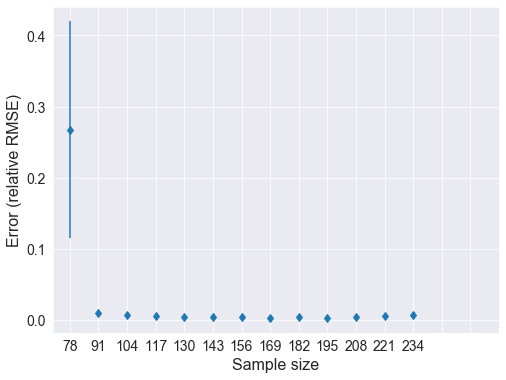

In [5]:
# Plot errors of cross-validation
filepath = '../output/paper/'
filename = 'error_cv_beta.csv'
error_stats = pd.read_csv(f'{filepath}{filename}', index_col = 'index')
plot_error_cv(error_stats, save_fig = True, save_path = f'{filepath}figure/')

<Figure size 576x432 with 0 Axes>

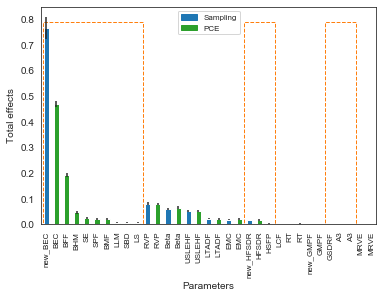

In [8]:
# sensitivity plot
df_plot = pd.read_csv(f'{filepath}sa_fig1.csv', index_col= 'Unnamed: 0')

sns.set_style('white')
current_palette = sns.color_palette()
# sns.set_color_codes(current_palette)
fig = plt.figure(figsize=(8, 6))
colors = list(np.where(df_plot.Type_num == 0, 0, 2))
colors = [current_palette[c] for c in colors]
ax = df_plot.plot(x='short_name', y='ST', kind='bar', 
                yerr='ST_conf', color=colors, legend=False, logy=False)
ax.set_ylabel('Total effects', fontsize=10)
ax.set_xlabel('Parameters', fontsize=10)
ax.tick_params(axis='x', which='major', labelsize=8)
index = [0, 20, 28]
xmin, ymin = [-0.3, 19.5, 27.5], 0
height, width = 0.79, [9.8, 3, 3]
for i  in range(len(index)):
    ax.add_patch(
        mpatches.Rectangle(
            xy=(xmin[i], ymin),  # point of origin.
            width=width[i],
            height=height,
            linewidth=1,
            color=current_palette[1],
            fill=False,
            linestyle='--'
        )
)   
SPL = mpatches.Patch(color=current_palette[0], label='Sampling')
PCE_Beta = mpatches.Patch(color=current_palette[2], label='PCE')
ax.legend(handles=[SPL, PCE_Beta], fontsize=8, loc=9) 
plt.savefig(f'{filepath}figure/sentivity_fig1.png', format='png', dpi=300, bbox_inches='tight')

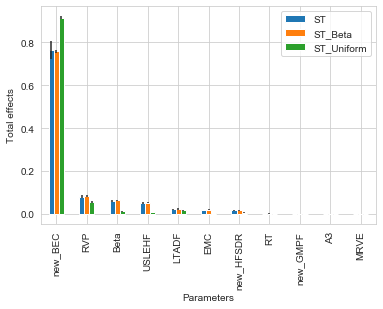

In [11]:
# plot sensitivity for PCE with 11 parameters of Beta, Uniform dists
df_plot = pd.read_csv(f'{filepath}sa_fig2.csv', index_col= 'Unnamed: 0')

sns.set_style('whitegrid')
ax = df_plot.plot(x='short_name', y=['ST','ST_Beta', 'ST_Uniform' ], kind='bar', 
                yerr=df_plot.loc[:, ['ST_conf','ST_conf_Beta', 'ST_conf_Uniform' ]].T.values, 
                legend=True, logy=False)
ax.set_ylabel('Total effects', fontsize=10)
ax.set_xlabel('Parameters', fontsize=10);         
plt.savefig(f'{filepath}figure/sentivity_fig2-2.png', format='png', dpi=300, bbox_inches='tight') 


In [12]:
from basic.utils import names_match

In [ ]:
with open(f'{filepath})